# Enzyme catalysed reaction modelling workflow based on EnzymeML
Author: Hannah Dienhart  
Last modified: 22.07.2021

## Abstract <a class="anchor" name="abstract"></a>
Today, we are challenged with vast amounts of unsorted data and non-reproducible research. To tackle this in the field of enzyme-catalysed reactions, [EnzymeML](https://enzymeml.org/) [<sup>1</sup>](#cite1), a data format according to the FAIR principles, is being developed. A workflow based on Jupyter Notebooks was designed and presented here to prove the value of EnzymeML and demonstrate how to interact with it.

## Table of Contents

* [Abstract](#abstract)
* [Introduction](#introduction)
* [Workflow](#workflow)
    * [User guide](#user_guide)
    * [Preparation](#preparation)
    * [Data extraction](#data_extraction)
    * [Visualisation](#visualisation)
    * [Kinetic modelling](#kinetic_modelling)
        * [Defining the differential equations](#defining_odes)
        * [Initialising the parameters](#initialising_parameters)
        * [Model fitting](#model_fitting)
    * [Results](#results)
        * [Model 1: irreversible Michaelis Menten](#model1)
        * [Model 2: irrev. Michaelis Menten with bias](#model2)
        * [Model 3: irrev. Michaelis Menten with lag](#model3)
        * [Model 4: irrev. Michaelis Menten with lag and bias](#model4)
        * [Conversion from absorption to concentration](#conversion)
* [Discussion](#discussion)
* [Outlook](#outlook)
* [Bibliography](#bibliography)

## Introduction <a class="anchor" name="introduction"></a>
This Jupyter Notebook demonstrates one workflow to model the experimental data of an enzyme catalysed reaction stored in an [EnzymeML](https://enzymeml.org/) document . This workflow serves as a proof of concept for the EnzymeML data format and its infrastructure. EnzymeML is a data format designed to enable data management of biocatalytic reactions with enzymes following the [FAIR principles](https://www.go-fair.org/fair-principles/). The abbreviation FAIR stands for findable, accessible, interoperable and reusable. These principles have become more and more important in many communities in today’s world, with so much data and cooperation across the globe. In research, we should not only focus on publishing but good replicable and reproducible publications [<sup>2</sup>](#cite2). Therefore all relevant data must be stored in a standardised way. Machine-readable documents facilitate cooperation. An EnzymeML document functions as a container to store all relevant data and metadata in one place in a searchable manner. It enables the exchange of data between experimentalists, modellers and databases, as seen in [Fig. 1](#Fig1). Experimentalists often use experimental platforms, such as electronic lab notebooks or spreadsheets, to keep track of their experimental data, such as reaction conditions, measurements and methods. The measured data from these experiments can be modelled on modelling platforms. A modelling platform can be an application with a graphical user interface or a script in a programming language with established libraries. Here this Jupyter Notebook functions as the modelling platform. All acquired data in the EnyzmeML document can be stored locally or transferred to a publication platform, such as an EnzymeML Dataverse or a database.

<a class="anchor" name="Fig1"></a>
  
![EnzymeML](https://github.com/EnzymeML/workflow-jupyter-notebooks/blob/main/images/Fig1.jpg?raw=true)  
Fig. 1: Schematic representation of the underlying idea of EnzymeML. The EnzymeML data format serves as a link between experimental platforms, modelling platforms and publication platforms.

The omex file format contains different files with all the data. Its structure is described in the manifest, which is written in XML, see [Fig. 2](#Fig2). The primary data from the time course measurements are stored in the CSV files. These are thoroughly described in the experiments, written in the established XML-based Systems Biology Markup Language SBML. These file formats enhance the searchability of the data. It is also possible to store additional data in a text file to describe methods used in the experiment or the modelling.

<a class="anchor" name="Fig2"></a>
  
![Omex archive](https://github.com/EnzymeML/workflow-jupyter-notebooks/blob/main/images/Fig2.jpg?raw=true)  
Fig. 2: Diagram of an EnzymeML omex archive with its various files and their relations to each other.

This Jupyter Notebook demonstrates the advantage of using EnzymeML in a small workflow to access and model the data from such an EnzymeML document. This workflow could be created with different applications and in various programming languages. In order to reach non-programmers, we decided to use a Jupyter Notebook. A Jupyter Notebook is an application to create documents with the file extension .ipynb. In the following, Jupyter Notebook refers to these documents themselves and not the application. For an efficient structure, Jupyter Notebooks consist of different kinds of cells. These cells can be markdown cells with descriptive text, equations or images, as this text is part of such a markdown cell. The other cell type is a code cell which the user can run. When run, many code cells generate output beneath them. The user can run each code cell individually or all in series without any knowledge of the used programming language. To guide the user, text cells above a code cell can describe what is done and will happen at runtime. Some Jupyter Notebooks incorporate interactive output  . In this Jupyter Notebook, all code is written in Python, but Jupyter supports over 40 programming languages.  
Jupyter Notebooks are part of well-developed infrastructure, shown in [Fig. 3](#Fig3) A Jupyter Notebook can be written and run on a local computer. But its strength is the easy shareability. One place to share Jupyter Notebooks with programmers are platforms like [GitHub](https://github.com/). There it can be publicly available or privately available to a team or collaboration. But to work on it, one must download it and operate it locally. Another way to publish is the [Notebook Viewer](https://nbviewer.jupyter.org/). After posting it, others can reach it via a link and interact with the Jupyter Notebook and the produced output on the platform. But they can’t refactor it. Refactoring and collaboration are made possible by [Google Colaboratory](https://colab.research.google.com/), short Colab. A Jupyter Notebook hosted on Colab can be executed on Google’s cloud server without the need to download it and run it locally. All needed libraries can be installed on the server. Everyone can work with it via a web browser.

<a class="anchor" name="Fig3"></a>
  
![Jupyter Notebook Infrastructure](https://github.com/EnzymeML/workflow-jupyter-notebooks/blob/main/images/Fig3.jpg?raw=true)  
Fig. 3: Jupyter Notebooks infrastructure, depicting diverse environments for programming and execution local and online.

The data used in this workflow originates from Stephan Malzacher's Bachelor Thesis. He filled out an [Excel spreadsheet](https://enzml.sloppy.zone/template/upload) to generate the EnzymeML document, which was then converted via the [EnzymeML API](https://enzml.sloppy.zone/swagger-ui/) convert request. The data contains time-course data from three absorption measurements over five minutes. The absorption correlates to pyruvate concentration to investigate the kinetics of its reaction to acetolactate and CO2 catalysed by an acetohydroxyacid synthase. The experiment was conducted at a temperature of 35°C and a pH value of 7.  
The following figure, [Fig. 4](#Fig4), shows a brief overview of the workflow. 

<a class="anchor" name="Fig4"></a>
  
![Workflow](https://github.com/EnzymeML/workflow-jupyter-notebooks/blob/main/images/Fig4.jpg?raw=true)  
Fig. 4: Representation of the modelling workflow in this Jupyter Notebook. Sequentially outlining the major steps.

After some minor preparation, such as package imports, the workflow starts with the EnzymeML document. After defining the path to the EnzymeML document, the data is extracted. Then the Jupyter Notebook gives a short overview of the data, including a plot of the time-course data. Following four kinetic models building on each other are defined. Next, the parameters for the models are initialised, and the data for the curve-fit gets selected. Now, the models are fitted against the data. Finally, the Jupyter Notebook presents the estimated parameters with standard errors and a fit statistic together with graphs containing the time-course data from the experiment and a curve with the estimated parameters as input.

## Workflow <a class="anchor" name="workflow"></a>

### User guide <a class="anchor" name="user_guide"></a>
We recommend to once run all cells before changing any code or executing single cells. If you use Colab, you can do this with the following menu options:
> Runtime/ Run all 

Or with the keyboard shortcut `Ctrl+F9`.  
This will ensure that all needed packages are loaded, and all variables are initialised. After that, feel free to explore the Jupyter Notebook cell by cell and change the code. To save your changes, you have to create a copy in your google drive or GitHub.  
This Jupyter Notebook ran without errors at Colab on July 20 2021 with the follwing dependencies:
> Python version: 3.7.11  
matplotlib 3.2.2  
numpy 1.19.5  
scipy 1.4.1  
lmfit 1.0.2  
requests 2.23.0

### Preparation <a class="anchor" name="preparation"></a>
Before the actual workflow starts, some preparations are done. The following code cell checks whether the Jupyter Notebook is executed on Colab or another platform. On Colab, the repository is pulled from Github, and the Python library lmfit gets installed. After that, all needed Python packages are imported, along with two scripts, from the utilities containing outsourced helper functions. These scripts help to reduce the code part in this Jupyter Notebook, enhancing the readability.

In [1]:
# For google colab
if 'google.colab' in str(get_ipython()):
    %cd /content
    #%rm -r workflow-jupyter-notebooks
    !git clone https://github.com/EnzymeML/workflow-jupyter-notebooks.git
    %cd workflow-jupyter-notebooks
    !pip install lmfit
else:
  print('Not running on CoLab')

#Imports
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit

from utilities.jsonhelper import JSONHelper
from utilities.modeler import Modeler

# initialise helpers
jsonH = JSONHelper("https://enzml.sloppy.zone/")
md = Modeler()

Not running on CoLab


### Data extraction <a class="anchor" name="data_extraction"></a>
In the following code cell, the EnzymeML document is selected by specifying the file path in the path variable: `path = 'datasets/pH optimum 7.omex'`.  
There are two ways to extract data from EnzymeML documents. One is to use the PyEnzyme Python library. PyEnzyme reads the omex file and returns an EnzymeML document object. This object has inbuilt functions to access the various data.   
The other way is to send a read request to the [EnzymeML API](https://enzml.sloppy.zone/swagger-ui/), which is programming languages independent. The outsourced code in the  JSONHelper sends the read request, and the API responds with a JSON formatted string that gets parsed into an object and stored in the `enzmldoc` variable. If no errors occur, the cell outputs a short overview; otherwise, it prints an error message.

In [2]:
path = 'datasets/pH optimum 7.omex'

# check for correct file path and file extension:
if os.path.isfile(path) and os.path.basename(path).lower().endswith('.omex'):
    readreq = jsonH.readRequest(path)
    if readreq == 200:
        enzmldoc = jsonH.getEnzmlJSON()
        print(enzmldoc)
    else:
        print('Error:'+str(readreq))
else:
    print('Incorrect file path.')

Title: pH optimum 7
Proteins: 
	ID: p0 	 Name: HcAHAS_C_unit
Reactants: 
	ID: s0 	 Name: pyruvate
	ID: s1 	 Name: acetolactate
	ID: s2 	 Name: Flavin dunucleotide
	ID: s3 	 Name: Magnesium sulfide
Reactions: 
Name: pH measurment 	 ID: r0
>>> Educts: 
	ID: s0 	 Name: pyruvate
>>> Products: 
	ID: s1 	 Name: acetolactate
>>> Modifiers: 
	ID: s2 	 Name: Flavin dunucleotide
	ID: p0 	 Name: HcAHAS_C_unit


### Visualisation <a class="anchor" name="visualisation"></a>
For a first impression of the time-course data, it is visualised with [matplotlib](https://matplotlib.org/). The output of the next cell plots the measured light absorption over time for three replicates, with the light absorption being proportional to the molar concentration of pyruvate, the substrate of the surveyed reaction. The curves show an almost sigmoidal course, with a lag phase initially before the slope reaches its maximum, followed by a flat ending above zero.

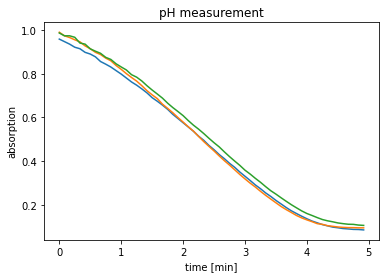

In [3]:
# get time-course data as np array 
time, data_measured = enzmldoc.getData('r0','s0')

# plot time-course data with matplotlib
plt.figure()
ax = plt.subplot()
for i in range(data_measured.shape[0]):
    ax.plot(time, data_measured[i, :], label='repl '+str(i+1))
ax.set_xlabel('time [min]')
ax.set_ylabel('absorption')
plt.title('pH measurement')
plt.show()

### Kinetic modelling <a class="anchor" name="kinetic_modelling"></a>
Following the observations of the time-course different kinetic models are defined and fitted to the measurement to discriminate which describes the data the best. The most common kinetic model in enzyme biocatalysis is the irreversible Michaelis Menten model, describing the kinetic with one differential equation. Therefore, it was taken as starting point for the discrimination. Building upon this model 1, three more models were defined. First, for model 2, a static bias was added to represent the data never reaching zero. Then a second differential equation was determined to reproduce the lag phase, leading to a system of coupled differential equations for model 3 but omitting the bias. Last model 4 combines both extensions incorporating bias and lag phase.

#### Defining the differential equations  <a class="anchor" name="defining_odes"></a>
In the following cell the differential equations are defined as Python functions. For instance, the function called `irreversible_Michaelis_Menten` is part of models 1 and 2. The equation describes the time-dependent change of the substrate concentration and usually is written as follows:  
> $\frac{dS}{dt}= \frac{-v_{max}S}{K_M+S}$  

Here it describes the change of the light absorption over time, which, as aforementioned, is proportional to the substrate concentration. This proportionality is described by the Lambert-Beer law [<sup>3</sup>](#cite3): $A = c \cdot \epsilon \cdot d$ . The resulting parameter values can be converted into concentrations by applying pyruvate’s molar extinction coefficient, which will be done later in the Jupyter Notebook.  
The second function called `iMM_with_lag` couples the irreversible Michaelis Menten equation with an equation describing the time-dependent change of the enzymatic reaction rate v as follows:  
> $\frac{dS}{dt}= \frac{-vS}{K_M+S}$  
> $\frac{dv}{dt}=a(v_{max}-v)$  

Thereby introducing the lag phase for models 3 and 4.

In [4]:
def irreversible_Michaelis_Menten(w, t, params):
    '''
    Differential equation
    Arguments:
        w: vector of state variables: w = [S]
        t: time
        params: parameters object from lmfit
    '''
    S = w
    
    vmax = params['vmax'].value
    Km = params['Km'].value
    
    # f(S'):
    f = -vmax*S/(Km+S) # dS/dt
    
    return f

def iMM_with_lag(w, t, params):
    '''
    Coupled differential equations
    Arguments:
        w: vector of state variables: w = [v,S]
        t: time
        params: parameters object from lmfit
    '''
    v, S = w
    
    a = params['a'].value
    vmax = params['vmax'].value
    Km = params['Km'].value
    
    # f(v', S'):
    f0 = a*(vmax-v) # dv/dt
    f1 = -v*S/(Km+S) # dS/dt
    
    return [f0,f1]

#### Initialising the parameters  <a class="anchor" name="initialising_parameters"></a>
The models’ parameters need to be initialised before the fit. The following parameters are part of all four models:  
S<sub>0</sub> is a variable parameter describing the initial pyruvate substrate concentration in mmol/L. It is substituted light absorption, which has been measured. Since the first absorption values for the three replicates differ, S<sub>0</sub> was not fixed but added as a variable parameter to be fitted. A function in the Modeler helper script computed the mean of the first values of the three replicates to initialise S<sub>0</sub>.  
KM is defined as the Michaelis-Menten constant describing the affinity of the enzyme to its substrate. Its value is the substrate concentration at which half of the enzymes are bound in the enzyme-substrate complex in mmol/L.  
v<sub>max</sub> is the maximal enzymatic reaction rate with which the substrate is converted into a product in min<sup>-1</sup>. It is initialised with the maximal gradient of all measured time courses.  
Additional models 2 and 4 contain the bias parameter, a static value added to all computed absorption values. It is incorporated in the residual function in the Modeler script as follows:  
> $\Delta S=S_{measured}-(S_{modelled}+bias)$  

The mean of the last measuring points of the replicates initialises the bias.  
The parameter a in models 3 and 4 describes the rate with which the maximal enzymatic reaction rate v<sub>max</sub> is reached in min<sup>-1</sup>.  
Lastly, v<sub>0</sub>, the initial enzymatic reaction rate of models 3 and 4, is fixed to 0 min<sup>-1</sup>.  
All parameters are stored in the parameters object from the python library [lmfit](https://lmfit.github.io/lmfit-py/) [<sup>4</sup>](#cite4).  

In [5]:
s0 = md.get_initial_S0(data_measured)
bias = md.get_initial_bias(data_measured)
vmax = md.get_initial_vmax(time, data_measured)
km = md.get_initial_Km(time, data_measured)

# Parameters for irreversible Michaelis Menten without lag or bias
params_MM = Parameters()
params_MM.add('S0', value=s0, min=0.1, max=s0+0.2*s0)
params_MM.add('vmax', value=vmax, min=0.0001, max=10.)
params_MM.add('Km', value=km, min=0.0001, max=s0)

# Parameters for Michaelis Menten with bias
params_with_bias = Parameters()
params_with_bias.add('S0', value=s0-bias, min=0.1, max=s0)
params_with_bias.add('bias', value=bias, min=0.001, max=s0*0.5)
params_with_bias.add('vmax', value=vmax, min=0.0001, max=10.)
params_with_bias.add('Km', value=km, min=0.0001, max=s0)

# Parameters for Michaelis Menten with lag
params_with_lag = Parameters()
params_with_lag.add('v0', value=0, vary=False)
params_with_lag.add('S0', value=s0, min=0.1, max=s0+0.2*s0)
params_with_lag.add('a', value=1., min=0.0001, max=10.)
params_with_lag.add('vmax', value=vmax, min=0.0001, max=10.)
params_with_lag.add('Km', value=km, min=0.0001, max=s0)

# Parameters for Michaelis Menten with lag and bias
params_with_lag_bias = Parameters()
params_with_lag_bias.add('v0', value=0, vary=False)
params_with_lag_bias.add('S0', value=s0-bias, min=0.1, max=s0)
params_with_lag_bias.add('bias', value=bias, min=0.001, max=s0*0.5)
params_with_lag_bias.add('a', value=1., min=0.0001, max=10.)
params_with_lag_bias.add('vmax', value=vmax, min=0.0001, max=10.)
params_with_lag_bias.add('Km', value=km, min=0.0001, max=s0)

#### Model fitting  <a class="anchor" name="model_fitting"></a>
First, the Python library [SciPy](https://www.scipy.org/) [<sup>5</sup>](#cite5) integrates the afore defined differential equations. Then lmfit minimises the residual between the computed and the measured S values for each time step, with the method of least squares. All function calls to these libraries are outsourced in the Modeler script.

In [6]:
results_dict = {}
# model 1: irreversible Michaelis Menten
result_MM = md.fit_model(time, data_measured, params_MM, irreversible_Michaelis_Menten)
results_dict['irreversible Michaelis Menten'] = result_MM

# model 2: Michaelis Menten with bias
result_MM_with_bias = md.fit_model(time, data_measured, params_with_bias, irreversible_Michaelis_Menten)
results_dict['irrev. Michaelis Menten with bias'] = result_MM_with_bias

# model 3: Michaelis Menten with lag
result_MM_with_lag = md.fit_model(time, data_measured, params_with_lag, iMM_with_lag)
results_dict['irrev. Michaelis Menten with lag'] = result_MM_with_lag

# model 4: Michaelis Menten with lag and bias
result_with_lag_bias = md.fit_model(time, data_measured, params_with_lag_bias, iMM_with_lag)
results_dict['irrev. Michaelis Menten with lag and bias'] = result_with_lag_bias

### Results  <a class="anchor" name="results"></a>
Finally, the results for the four models are shown one after another. All show statistics of the fit and the calculated parameter values with standard errors generated by lmfit. The quality of the models can be compared with the reduced chi-square, the Akaike criterion and the Bayesian criterion, all accounting for the number of parameters and aiming for a lower value. Below the fit statistics, the models’ output with the estimated parameters and the measured data are plotted.

#### Model 1: irreversible Michaelis Menten  <a class="anchor" name="model1"></a>
Model 1 has a reduced chi-square value of 7.6e-04. The standard errors of the parameters are relatively low, but the red line in the graph shows a significant discrepancy to the measured data points.

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 180
    # variables        = 3
    chi-square         = 0.13461421
    reduced chi-square = 7.6053e-04
    Akaike info crit   = -1289.69385
    Bayesian info crit = -1280.11498
[[Variables]]
    S0:    1.03344703 +/- 0.00545727 (0.53%) (init = 0.9780667)
    vmax:  0.26212654 +/- 0.00752399 (2.87%) (init = 0.2668)
    Km:    0.09607263 +/- 0.01484151 (15.45%) (init = 0.04726667)
[[Correlations]] (unreported correlations are < 0.100)
    C(vmax, Km) =  0.962
    C(S0, vmax) =  0.746
    C(S0, Km)   =  0.581


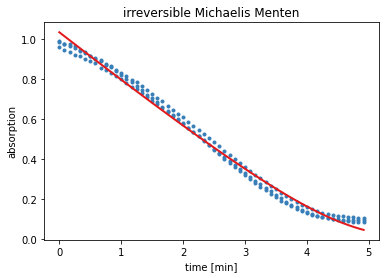

In [7]:
result = result_MM
report_fit(result)
w0 = result.params['S0'].value
data_fitted = md.solveODE(irreversible_Michaelis_Menten, time, w0, result.params)
plt.figure()
ax = plt.subplot()
for i in range(data_measured.shape[0]):
    ax.plot(time, data_measured[i, :], 'o', ms=3, color='#377eb8', label='repl '+str(i+1))
ax.plot(time, data_fitted[:], '-', linewidth=2, color='#e31a1c', label='fitted data')
ax.set_xlabel('time [min]')
ax.set_ylabel('absorption')
plt.title('irreversible Michaelis Menten')
plt.show()

#### Model 2: irreversible Michaelis Menten with bias <a class="anchor" name="model2"></a>
The reduced chi-square value of 4.6e-04 for model 2 is better than that of model 1. However, the standard error for the Michaelis Menten constant is exceptionally high, and the graph still shows a considerable discrepancy. Furthermore, due to the very low KM value, the curve looks like it has a kink.

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 180
    # variables        = 4
    chi-square         = 0.08045447
    reduced chi-square = 4.5713e-04
    Akaike info crit   = -1380.34373
    Bayesian info crit = -1367.57190
[[Variables]]
    S0:    0.91874326 +/- 0.00556553 (0.61%) (init = 0.8834)
    bias:  0.10519338 +/- 0.00390481 (3.71%) (init = 0.09466667)
    vmax:  0.22528129 +/- 0.00322437 (1.43%) (init = 0.2668)
    Km:    0.00173552 +/- 0.00408760 (235.53%) (init = 0.04726667)
[[Correlations]] (unreported correlations are < 0.100)
    C(vmax, Km) =  0.888
    C(S0, bias) = -0.711
    C(S0, vmax) =  0.563
    C(S0, Km)   =  0.367


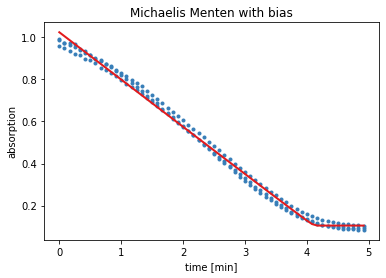

In [8]:
result = result_MM_with_bias
report_fit(result)
w0 = result.params['S0'].value
data_fitted = md.solveODE(irreversible_Michaelis_Menten, time, w0, result.params)
plt.figure()
ax = plt.subplot()
for i in range(data_measured.shape[0]):
    ax.plot(time, data_measured[i, :], 'o', color='#377eb8', ms=3, label='repl '+str(i+1))
ax.plot(time, data_fitted[:]+result.params['bias'].value, '-', linewidth=2, color='#e31a1c', label='fitted data')
ax.set_xlabel('time [min]')
ax.set_ylabel('absorption')
plt.title('Michaelis Menten with bias')
plt.show()

#### Model 3: irreversible Michaelis Menten with lag <a class="anchor" name="model3"></a>
Model 3 has an even better reduced chi-square value of 3.3e-04. Also, the standard errors are reduced though still notable. As a result, the red curve starts to converge towards the measurements.

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 42
    # data points      = 180
    # variables        = 4
    chi-square         = 0.05793467
    reduced chi-square = 3.2917e-04
    Akaike info crit   = -1439.45130
    Bayesian info crit = -1426.67947
[[Variables]]
    v0:    0 (fixed)
    S0:    0.95065623 +/- 0.00409304 (0.43%) (init = 0.9780667)
    a:     0.85668633 +/- 0.16143607 (18.84%) (init = 1)
    vmax:  0.59403350 +/- 0.12494890 (21.03%) (init = 0.2668)
    Km:    0.50310373 +/- 0.14084696 (28.00%) (init = 0.04726667)
[[Correlations]] (unreported correlations are < 0.100)
    C(vmax, Km) =  0.995
    C(a, vmax)  = -0.979
    C(a, Km)    = -0.956
    C(S0, a)    =  0.642
    C(S0, vmax) = -0.534
    C(S0, Km)   = -0.492


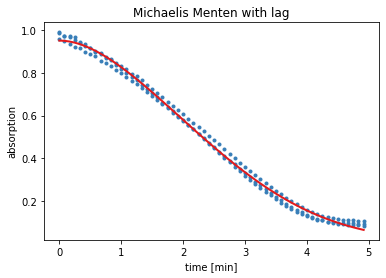

In [9]:
result = result_MM_with_lag
report_fit(result)
w0 = result.params['v0'].value, result.params['S0'].value
data_fitted = md.solveODE(iMM_with_lag, time, w0, result.params)
plt.figure()
ax = plt.subplot()
for i in range(data_measured.shape[0]):
    ax.plot(time, data_measured[i, :], 'o', color='#377eb8', ms=3, label='repl '+str(i+1))
ax.plot(time, data_fitted[:, 1], '-', linewidth=2, color='#e31a1c', label='fitted data')
ax.set_xlabel('time [min]')
ax.set_ylabel('absorption')
plt.title('Michaelis Menten with lag')
plt.show()

#### Model 4: irreversible Michaelis Menten with lag and bias <a class="anchor" name="model4"></a>
With a reduced chi-square value of 2.4e-04, model 4 fits the data best. Likewise, the standard errors are lower, and the red curve has a sigmoidal course similar to that of the measured points.

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 180
    # variables        = 5
    chi-square         = 0.04123983
    reduced chi-square = 2.3566e-04
    Akaike info crit   = -1498.63538
    Bayesian info crit = -1482.67059
[[Variables]]
    v0:    0 (fixed)
    S0:    0.86085394 +/- 0.00534280 (0.62%) (init = 0.8834)
    bias:  0.09725100 +/- 0.00436836 (4.49%) (init = 0.09466667)
    a:     1.69790846 +/- 0.15518051 (9.14%) (init = 1)
    vmax:  0.28159299 +/- 0.01082284 (3.84%) (init = 0.2668)
    Km:    0.04761832 +/- 0.01094640 (22.99%) (init = 0.04726667)
[[Correlations]] (unreported correlations are < 0.100)
    C(vmax, Km)   =  0.947
    C(a, vmax)    = -0.895
    C(a, Km)      = -0.743
    C(S0, bias)   = -0.736
    C(bias, Km)   = -0.638
    C(bias, vmax) = -0.504
    C(bias, a)    =  0.333
    C(S0, Km)     =  0.312
    C(S0, a)      =  0.211
    C(S0, vmax)   =  0.122


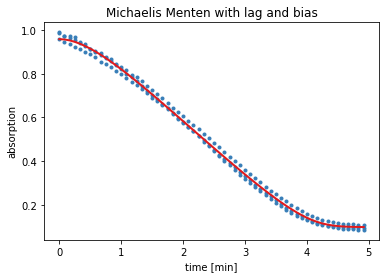

In [10]:
result = result_with_lag_bias
report_fit(result)
w0 = result.params['v0'].value, result.params['S0'].value
data_fitted = md.solveODE(iMM_with_lag, time, w0, result.params)
plt.figure()
ax = plt.subplot()
for i in range(data_measured.shape[0]):
    ax.plot(time, data_measured[i, :], 'o', color='#377eb8', ms=3, label='repl '+str(i+1))
ax.plot(time, data_fitted[:, 1]+result.params['bias'].value, '-', linewidth=2, color='#e31a1c', label='fitted data')
ax.set_xlabel('time [min]')
ax.set_ylabel('absorption')
plt.title('Michaelis Menten with lag and bias')
plt.show()

#### Conversion from absorption to concentration <a class="anchor" name="conversion"></a>
All estimated parameters are still derived from light absorption. To be comparable, S<sub>0</sub>, bias and K<sub>M</sub> are converted to concentration in mmol/L by getting divided by the molar extinction coefficient of pyruvate of 24.8 L*cm/mol and multiplied by the factor 1000 and afterwards mapped in a table.

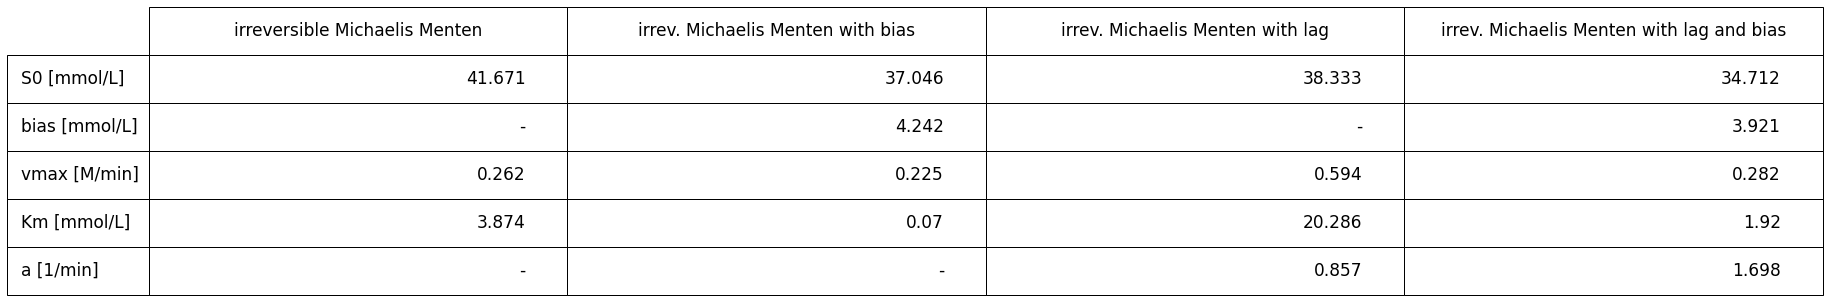

In [11]:
table_data, columns, rows = md.get_table_data(results_dict)
fig, ax = plt.subplots(figsize =(30,2))
table = ax.table(cellText=table_data, loc='center', colLabels=columns, rowLabels=rows)
table.set_fontsize(20)
table.scale(1,4)
ax.axis('off')
plt.show()

## Discussion <a class="anchor" name="discussion"></a>
For his Bachelor Thesis, Stephan Malzacher determined v<sub>max</sub> in excel by computing the gradient of the linear part of the curves of the three replicas. The linear portion was specified with visual judgment. This method yielded a v<sub>max</sub> value of 0.246 min<sup>-1</sup>. Aside from model 3, all are in this magnitude. For example, model 4 produced 0.282 min<sup>-1</sup> for v<sub>max</sub>. Apart from v<sub>max</sub>, no other kinetic parameters were determined.  
For the lag phase, the initial enzymatic reaction rate was assumed to be 0, and the parameter v<sub>0</sub> was fixed to this value. However, this is a significant simplification leading to fewer parameters for the model, but most likely a less accurate result. One reason for the lag phase could be an unfavourable distribution of enzyme and substrate in the sample, but this is unlikely since it was mixed beforehand. Another hypothesis could be that the enzyme only gradually reaches its maximum activity after contact with the substrate.  
Noteworthy are the low values for K<sub>M</sub> even after adding the bias in models 2 and 4. Since the experiment was carried out with only replicas of one initial concentration, the concentration range in the measurement could be unsuitable for the determination of K<sub>M</sub>. To determine K<sub>M</sub> from only one concentration progress curve, the initial substrate concentration must be in the order of K<sub>M</sub>[<sup>6</sup>](#cite6).  
The initial pyruvate substrate concentration was 50 mmol/L, compared to S<sub>0</sub> and the sum of S<sub>0</sub> and bias, respectively, from the models. These range between 38 mmol/L and 41 mmol/L. There may be various reasons for this significant deviation. For one, the time delay between the addition of the enzyme and the beginning of the measurement. Therefore part of the pyruvate has already been converted. Second, the molar extinction coefficient value is taken from literature, but it can vary depending on temperature and other external influences. Furthermore, the buffer and the enzyme can influence the absorption as well. However, in the laboratory, on a day to day basis, these deviations play no role. Often their sole interest is the gradient of the curve, not the whole kinetic and its parameters. But one should keep these inaccuracies in mind when comparing results of different experiments. All of this shows the importance of storing all obtained data together with metadata and not just computed results to make reanalysis possible, which is the aim of EnzymeML and Jupyter Notebooks like this.  
Such analysis becomes comprehensible, comparable, and replicable by saving the workflow in a Jupyter Notebook.

## Outlook <a class="anchor" name="outlook"></a>
The next extension of the workflow will write the models and the obtained parameters back to the EnzymeML document. The extended EnzymeML document will then be saved on publishing platforms such as DARUS.  
In addition, more Jupyter Notebooks in cooperation with other experimentalists will follow.  
To keep up to date with the development of EnzymeML and new Jupyter Notebooks, visit [EnzymeML.org](https://enzymeml.org/).  
This Jupyter Notebook on [GitHub](https://github.com/EnzymeML/workflow-jupyter-notebooks) and on [Colab](https://colab.research.google.com/github/EnzymeML/workflow-jupyter-notebooks/blob/main/Enzyme_catalysed_reaction_modelling_workflow_based_on_EnzymeML.ipynb).

## Bibliography <a class="anchor" name="bibliography"></a>

<a class="anchor" name="cite1"></a>
[1] Pleiss J, 2021. Standardized data, scalable documentation, sustainable storage – EnzymeML as a basis for FAIR data management in biocatalysis. ChemCatChem (in press) https://doi.org/10.1002/cctc.202100822

<a class="anchor" name="cite2"></a>
[2] Halling, P. et al. An empirical analysis of enzyme function reporting for experimental reproducibility: Missing/incomplete information in published papers. Biophys. Chem. 242, 22–27 (2018)

<a class="anchor" name="cite3"></a>
[3] The Beer-Lambert Law. (2020, August 15). Retrieved July 20, 2021, from https://chem.libretexts.org/@go/page/3747

<a class="anchor" name="cite4"></a>
[4] Newville, Matthew, Stensitzki, Till, Allen, Daniel B., & Ingargiola, Antonino. (2014, September 21). LMFIT: Non-Linear Least-Square Minimization and Curve-Fitting for Python (Version 0.8.0). Zenodo. http://doi.org/10.5281/zenodo.11813

<a class="anchor" name="cite5"></a>
[5] Virtanen, P., Gommers, R., Oliphant, T.E. et al. SciPy 1.0: fundamental algorithms for scientific computing in Python. Nat Methods 17, 261–272 (2020). https://doi.org/10.1038/s41592-019-0686-2

<a class="anchor" name="cite6"></a>
[6] Wylie Stroberg, Santiago Schnell,
On the estimation errors of KM and V from time-course experiments using the Michaelis–Menten equation,
Biophysical Chemistry,
Volume 219,
2016,
Pages 17-27,
ISSN 0301-4622,
https://doi.org/10.1016/j.bpc.2016.09.004.